# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [1]:
### YOUR CODE HERE ###

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import (GridSearchCV, train_test_split, StratifiedKFold)

df_main = pd.read_csv('./data/telecom_users.csv', dtype = 
                      dict.fromkeys(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                                    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'], 'category'))

pd.options.display.max_columns = 22

In [2]:
# Нет пропущенных значений
# 5986 записей

df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Unnamed: 0        5986 non-null   int64   
 1   customerID        5986 non-null   object  
 2   gender            5986 non-null   category
 3   SeniorCitizen     5986 non-null   category
 4   Partner           5986 non-null   category
 5   Dependents        5986 non-null   category
 6   tenure            5986 non-null   int64   
 7   PhoneService      5986 non-null   category
 8   MultipleLines     5986 non-null   category
 9   InternetService   5986 non-null   category
 10  OnlineSecurity    5986 non-null   category
 11  OnlineBackup      5986 non-null   category
 12  DeviceProtection  5986 non-null   category
 13  TechSupport       5986 non-null   category
 14  StreamingTV       5986 non-null   category
 15  StreamingMovies   5986 non-null   category
 16  Contract          5986 n

In [3]:
# Вероятно, неописанное в Codebook поле 'Unnamed: 0' - это идентификатор клиента

df_main['Unnamed: 0'].nunique()

5986

In [4]:
df_main.describe(include=[np.number])

,Unnamed: 0,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000
mean,3533.561310,32.468760,64.802213
std,2035.705666,24.516391,30.114702
min,0.000000,0.000000,18.250000
25%,1777.250000,9.000000,35.650000
50%,3546.500000,29.000000,70.400000
75%,5291.750000,56.000000,89.900000
max,7042.000000,72.000000,118.750000


In [5]:
df_main.describe(include=[np.object, 'category'])

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,5986,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,5611,2
top,6372-RFVNS,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3050,5020,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,10,4399


In [6]:
df_main.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [7]:
# Количество неотключившихся и отключившихся клиентов. Имеем несбалансированный набор данных.

df_main.Churn.value_counts().to_dict()

{'No': 4399, 'Yes': 1587}

# 2. Исследование зависимостей и формулирование гипотез

In [8]:
### YOUR CODE HERE ###

df_main.groupby('Churn').head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
5,2215,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,Yes,No,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.2,No
11,4653,2091-MJTFX,Female,0,Yes,Yes,30,No,No phone service,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,No,Credit card (automatic),51.20,1561.5,Yes
18,6508,8708-XPXHZ,Female,0,Yes,Yes,42,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.20,4186.3,Yes
19,5636,0601-WZHJF,Male,0,Yes,No,14,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,46.35,667.7,Yes
23,3550,0963-ZBDRN,Male,0,No,No,32,Yes,No,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,96.20,3183.4,Yes


Из In[11]:

1) total_charges сильно коррелирует с tenure и с monthly_charges, еще с несколькими признаками есть высокие коэффициенты корреляции.  
2) tenure сильно коррелирует с contract и еще с несколькими признаками корреляция выше 0,3.  
3) Нужно попробовать построить модели без этих признаков.  
4) Есть сильная обратная корреляция между charn и признаками: contract, tech_support, online_security, total_charges.  
    -  Т.е. чем долговременней тип контракта, тем больше клиент склонен к уходу.  
    -  Люди, подключившие техподдержку и онлайн-безопасность, чаще уходят.  
    -  Чем больше человек заплатил за услуги за все время, тем больше вероятность ухода клиента.  
5) Из п.4 возможно следует, что клиенты уходят из-за цен на услуги, в т.ч. цены на техподдержку, онлайн-безопасность.

# 3. Построение моделей для прогнозирования оттока

In [9]:
### YOUR CODE HERE ###

# Попробуем сделать все входные признаки сразу линейно нормализованными

list_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for i in list_features:
    df_main[i] = df_main[i].cat.codes / (df_main[i].cat.codes.nunique() - 1)

df_main['MonthlyCharges'] = df_main.MonthlyCharges / df_main.MonthlyCharges.max()
df_main['tenure'] = df_main.tenure / df_main.tenure.max()

df_main['TotalCharges'] = pd.to_numeric(df_main.TotalCharges, errors='coerce')
df_main['TotalCharges'] = df_main.TotalCharges.fillna(0)
df_main['TotalCharges'] = df_main.TotalCharges / df_main.TotalCharges.max()

Старая версия, отключено

df_main['_gender'] = df_main.gender.map({'Male': 1, 'Female': 0})
df_main['_partner'] = df_main.Partner.map({'Yes': 1, 'No': 0})
df_main['_dependents'] = df_main.Dependents.map({'Yes': 1, 'No': 0})
df_main['_tenure'] = df_main.tenure / df_main.tenure.max()
df_main['_phone_service'] = df_main.PhoneService.map({'Yes': 1, 'No': 0})
df_main['_multiple_lines'] = df_main.MultipleLines.map({'Yes': 1, 'No': 0, 'No phone service': .5})
df_main['_internet_service'] = df_main.InternetService.map({'DSL': 1, 'No': 0, 'Fiber optic': .5})
df_main['_online_security'] = df_main.OnlineSecurity.map({'Yes': 1, 'No': 0, 'No internet service': .5})
df_main['_online_backup'] = df_main.OnlineBackup.map({'Yes': 1, 'No': 0, 'No internet service': .5})
df_main['_device_protection'] = df_main.DeviceProtection.map({'Yes': 1, 'No': 0, 'No internet service': .5})
df_main['_techSupport'] = df_main.TechSupport.map({'Yes': 1, 'No': 0, 'No internet service': .5})
df_main['_streaming_tv'] = df_main.StreamingTV.map({'Yes': 1, 'No': 0, 'No internet service': .5})
df_main['_streaming_movies'] = df_main.StreamingMovies.map({'Yes': 1, 'No': 0, 'No internet service': .5})
df_main['_contract'] = df_main.Contract.map({'Two year': 1, 'Month-to-month': 0, 'One year': .5})
df_main['_paperless_billing'] = df_main.PaperlessBilling.map({'Yes': 1, 'No': 0})
df_main['_payment_method'] = df_main.PaymentMethod.map({'Credit card (automatic)': 1, 
                                                        'Bank transfer (automatic)': 0,
                                                        'Electronic check': 1/3,
                                                        'Mailed check': 2/3})
df_main['_monthly_charges'] = df_main.MonthlyCharges / df_main.MonthlyCharges.max()

df_main['_total_charges'] = pd.to_numeric(df_main.TotalCharges, errors='coerce')
df_main['_total_charges'] = df_main._total_charges.fillna(0)
df_main['_total_charges'] = df_main._total_charges / df_main._total_charges.max()

df_main['_churn'] = df_main.Churn.map({'Yes': 1, 'No': 0})

In [10]:
df_main

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,1.0,0.0,1.0,1.0,1.000000,1.0,1.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,1.0,0.0,0.333333,0.202947,0.199734,0.0
1,4528,9688-YGXVR,0.0,0.0,0.0,0.0,0.611111,1.0,0.0,0.5,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.333333,0.742316,0.457489,0.0
2,6344,9286-DOJGF,0.0,1.0,1.0,0.0,0.527778,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.631158,0.330445,1.0
3,6739,6994-KERXL,1.0,0.0,0.0,0.0,0.055556,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.666667,0.470737,0.027462,0.0
4,432,2181-UAESM,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.450105,0.013760,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,1.0,0.0,1.0,0.0,0.013889,1.0,0.0,0.5,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.666667,0.800000,0.010939,1.0
5982,5191,5982-PSMKW,0.0,0.0,1.0,1.0,0.319444,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.333333,0.767158,0.253120,0.0
5983,5226,8044-BGWPI,1.0,0.0,1.0,1.0,0.166667,1.0,0.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.0,1.0,0.666667,0.178105,0.035240,0.0
5984,5390,7450-NWRTR,1.0,1.0,0.0,0.0,0.166667,1.0,1.0,0.5,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.666667,0.837474,0.138190,1.0


In [11]:
# Выберем признаки

X = df_main.loc[:,'gender':'TotalCharges']
Y = df_main.Churn

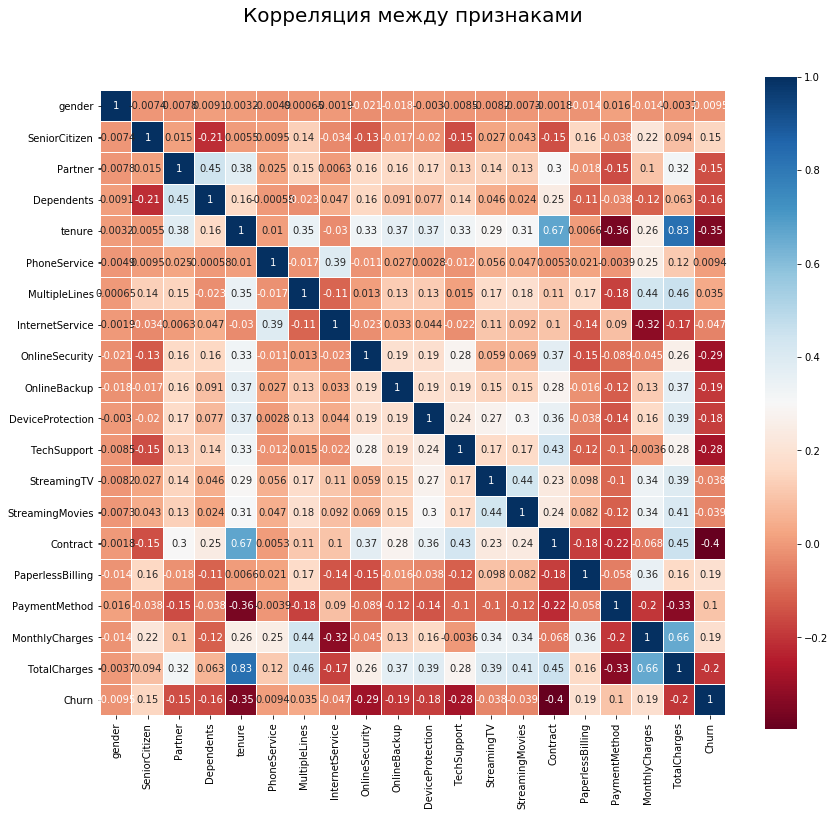

In [12]:
# scatter_matrix при таком количестве признаков получалась нечитаемой - взял heatmap, 
# чтобы посмотреть корреляцию между признаками

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Корреляция между признаками', y=1.1, size=20)
sns.heatmap(df_main.loc[:,'gender':].astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True);

In [13]:
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [14]:
knn_params = {'n_neighbors': range(1, 100)}
gbc_params = gbc_params = {'loss':['deviance'], 'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2], 
                           'n_estimators':[10]}
rfc_params = {'n_estimators': range(10, 100, 10), 'min_samples_leaf': range(1, 5)}
svc_params = {'kernel': ['linear', 'rbf'], 'C': np.arange(0.1, 1, 0.2)}

In [15]:
knc = KNeighborsClassifier(knn_params)
gbc = GradientBoostingClassifier(gbc_params, random_state=1)
rfc = RandomForestClassifier(rfc_params, random_state=1)
svc = SVC(svc_params, random_state=1, probability=True)

In [16]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5476,0.0,0.0,1.0,0.0,0.694444,1.0,1.0,0.5,1.0,1.0,0.0,1.0,1.0,1.0,0.5,0.0,0.666667,0.914105,0.646037
4586,1.0,0.0,1.0,0.0,0.305556,1.0,0.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.0,1.0,0.000000,0.172211,0.054296
5404,1.0,0.0,0.0,0.0,0.041667,1.0,0.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0,1.000000,0.178526,0.005993
100,1.0,0.0,0.0,1.0,0.763889,1.0,0.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.000000,0.160842,0.115316
2779,1.0,0.0,1.0,1.0,0.013889,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.410526,0.005613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0.0,0.0,0.0,0.0,0.013889,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.212632,0.002907
5192,0.0,0.0,1.0,0.0,0.611111,1.0,1.0,0.5,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.666667,0.809263,0.502499
3980,1.0,1.0,0.0,0.0,0.791667,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.5,1.0,0.666667,0.450526,0.349553
235,1.0,0.0,0.0,0.0,0.430556,1.0,0.0,0.5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.666667,0.660632,0.280392


In [17]:
knc_gs = GridSearchCV(estimator=knc, cv=skf, param_grid=knn_params).fit(x_train, y_train)
gbc_gs = GridSearchCV(estimator=gbc, cv=skf, param_grid=gbc_params).fit(x_train, y_train)
rfc_gs = GridSearchCV(estimator=rfc, cv=skf, param_grid=rfc_params).fit(x_train, y_train)
svc_gs = GridSearchCV(estimator=svc, cv=skf, param_grid=svc_params).fit(x_train, y_train)

### 3.1. Пробуем построить модели для набора данных без Contract, TechSupport, OnlineSecurity и TotalCharges

In [18]:
X1 = X.drop(['Contract', 'TechSupport', 'OnlineSecurity', 'TotalCharges'], axis=1)
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, Y, test_size=0.2, random_state=1)

In [19]:
knc1_gs = GridSearchCV(estimator=knc, cv=skf, param_grid=knn_params).fit(x1_train, y1_train)
gbc1_gs = GridSearchCV(estimator=gbc, cv=skf, param_grid=gbc_params).fit(x1_train, y1_train)
rfc1_gs = GridSearchCV(estimator=rfc, cv=skf, param_grid=rfc_params).fit(x1_train, y1_train)
svc1_gs = GridSearchCV(estimator=svc, cv=skf, param_grid=svc_params).fit(x1_train, y1_train)

# 4. Сравнение качества моделей 

In [20]:
### YOUR CODE HERE ###

def evaluate_estimators(estimators_list: list, x_test_local, y_test_local):
    ''' На вход - обученные алгоритмы и тестовые наборы данных, на выход - оценка всех их оптом '''

    result_list = []

    for i in estimators_list:
        estimator_name = str(i.__dict__['estimator'].__class__)
        first_letter_number = -1 * estimator_name[::-1].find('.')
        last_letter_number = len(estimator_name) - 2

        result_list.append([estimator_name[first_letter_number: last_letter_number], 
                            roc_auc_score(y_test_local, i.predict_proba(x_test_local)[:,1])])

    print(pd.DataFrame(result_list, columns = ['Классификатор', 'roc_auc_score']))
    print(f"Средний roc_auc = {pd.DataFrame(result_list, columns = ['Классификатор', 'roc_auc_score'])['roc_auc_score'].mean()}")

In [21]:
# Все признаки

evaluate_estimators([knc_gs, gbc_gs, rfc_gs, svc_gs], x_test, y_test)

                Классификатор  roc_auc_score
0        KNeighborsClassifier       0.798773
1  GradientBoostingClassifier       0.834171
2      RandomForestClassifier       0.829678
3                         SVC       0.817995
Средний roc_auc = 0.8201543664143538


In [22]:
# Без признаков Contract, TechSupport, OnlineSecurity и TotalCharges

evaluate_estimators([knc1_gs, gbc1_gs, rfc1_gs, svc1_gs], x1_test, y1_test)

                Классификатор  roc_auc_score
0        KNeighborsClassifier       0.763996
1  GradientBoostingClassifier       0.818291
2      RandomForestClassifier       0.807848
3                         SVC       0.803441
Средний roc_auc = 0.79839413372582


Выводы:

1. При удалении признаков, сильно коррелирующих с другими признаками средняя метрика ROC_AUC снизилась.
2. Модель на классификаторах GradientBoostingClassifier и RandomForestClassifier дает метрику ROC_AUC лучше моделей на KNeighborsClassifier и SVC.